------
<h1>
    <center>
       Preprocessing of Provided Data<br><br>First Batch<br>
    </center>
</h1>

------


## Imports of Required Packages

In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
### Set a base directory
# os.chdir("/Users/ldjeutsch/Urban Malaria Proj Dropbox/urban_malaria/data/nigeria/kano_ibadan")
!ls -hl

total 13112
-rw-r--r--  1 ldjeutsch  staff   2.3M Apr 23 19:05 00-data-preprocessing.ipynb
-rw-r--r--  1 ldjeutsch  staff   1.0M Apr 25 19:02 01-data-download.ipynb
-rw-r--r--  1 ldjeutsch  staff   2.5M Apr 23 15:51 data-preprocessing.ipynb
-rw-r--r--@ 1 ldjeutsch  staff   581K Apr 19 13:55 image_enhancement.ipynb
-rw-r--r--@ 1 ldjeutsch  staff    14K Apr 22 20:00 python_basic_guide.ipynb


## Explore Availavle Data for Ibadan Campaign

The motivation of choosing data for city is due to the fact that the settlement type data obtained from the ground study are not imbalanced like in the cases of Kano and Ilorin cities. This means a specific settlement types (informa, formal or slum) is not dominant in the data.

In [3]:
fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_fiveLGAshapes/Ibadan_metro_fiveLGAshapes.shp"
ib_lga_shape1 = gpd.read_file(fname)

fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_ward_fiveLGAs/Ibadan_metro_fiveLGAs.shp"
ib_lga_shape2 = gpd.read_file(fname)

In [4]:
ib_lga_shape2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   StateCode  59 non-null     object  
 1   WardCode   59 non-null     object  
 2   WardName   59 non-null     object  
 3   LGACode    59 non-null     object  
 4   Urban      59 non-null     object  
 5   Source     59 non-null     object  
 6   Timestamp  59 non-null     object  
 7   GlobalID   59 non-null     object  
 8   AMAPCODE   59 non-null     object  
 9   geometry   59 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 4.7+ KB


In [5]:
ib_lga_shape2.head()

,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
3,OY,OYSINE09,Oja Gbo,31007,Yes,INEC,2019-03-16,5ebd3bb8-f111-495e-8055-2f3fd9f83906,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90998 7.38441, 3...."
4,OY,OYSINE05,Basorun,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


In [6]:
ib_lga_shape1.tail()

,LGACode,LGAName,StateCode,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,31006,Ibadan North,OY,eHA_Polio,2019-08-09,fb782fd3-1a49-4bfa-9a64-c9561cc1c0bc,NIE OYS BDJ,"POLYGON ((3.89913 7.37960, 3.89888 7.37942, 3...."
1,31007,Ibadan North East,OY,WHO,2019-08-09,60dae0a9-7b69-47e9-9024-1e425fb61499,NIE OYS AGG,"POLYGON ((3.92804 7.39108, 3.92817 7.39105, 3...."
2,31008,Ibadan North West,OY,WHO,2019-08-09,818501be-e639-4414-b2df-ca32662cde7b,NIE OYS NRK,"POLYGON ((3.89160 7.37727, 3.89155 7.37730, 3...."
3,31009,Ibadan South East,OY,WHO,2019-08-09,0b8e1f11-70dc-4d07-9e56-a3151064449d,NIE OYS MAP,"POLYGON ((3.91557 7.34398, 3.91434 7.34378, 3...."
4,31010,Ibadan South West,OY,WHO,2019-08-09,0121db2a-0d0a-4d7b-a471-3cdb3264efa3,NIE OYS LUY,"POLYGON ((3.88016 7.34939, 3.87926 7.34826, 3...."


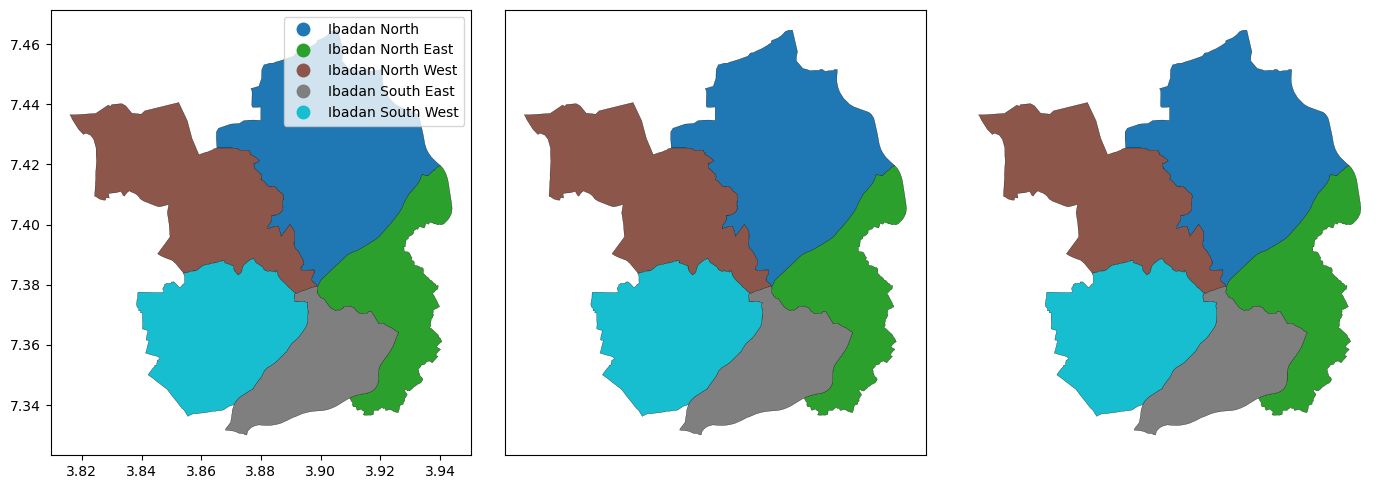

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ib_lga_shape1.plot(ax=ax[0], column="LGAName", legend=True, edgecolor="k", linewidth=0.2)
ib_lga_shape1.plot(ax=ax[1], column="LGAName", legend=False, edgecolor="k", linewidth=0.2)
ib_lga_shape1.plot(ax=ax[2], column="LGAName", legend=False, edgecolor="k", linewidth=0.2)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[2].spines[edge].set_visible(False)
fig.tight_layout();

### Ibadan City Divisions

In [8]:
ib_lga_shape2.head()

,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
3,OY,OYSINE09,Oja Gbo,31007,Yes,INEC,2019-03-16,5ebd3bb8-f111-495e-8055-2f3fd9f83906,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90998 7.38441, 3...."
4,OY,OYSINE05,Basorun,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


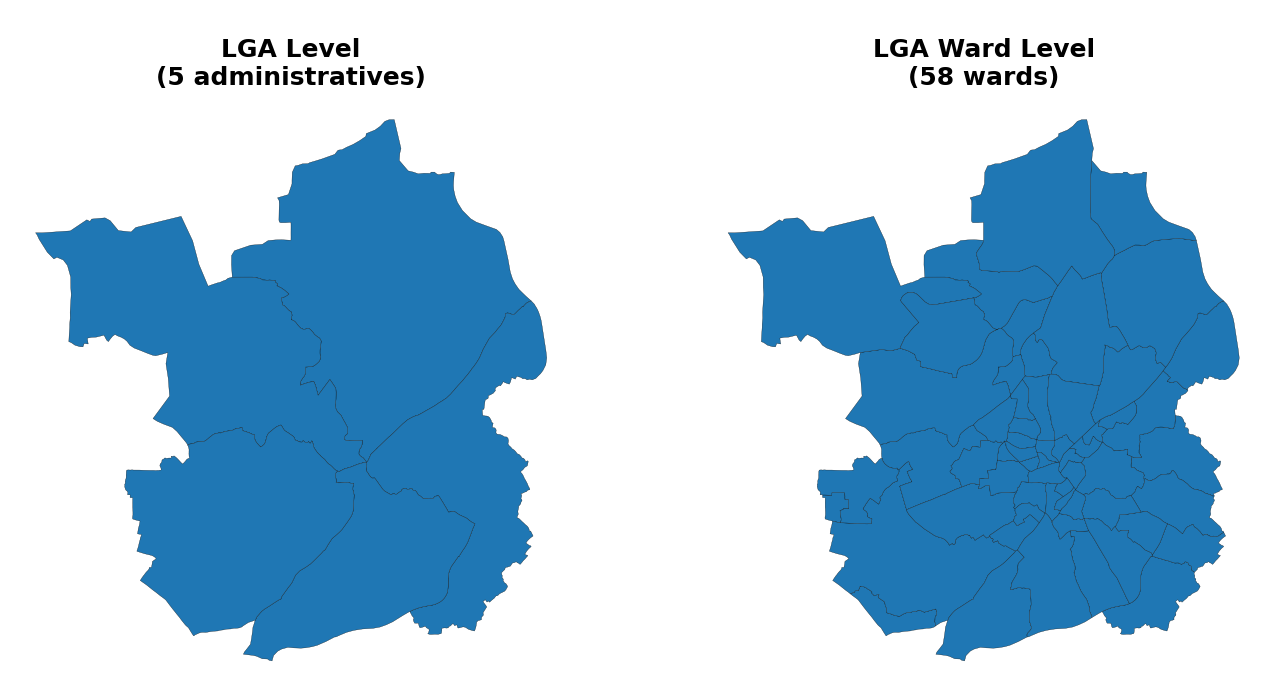

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ib_lga_shape1.plot(ax=ax[0], legend=False, edgecolor="k", linewidth=0.2)
ib_lga_shape2.plot(ax=ax[1], legend=False, edgecolor="k", linewidth=0.2)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nLGA Level\n({ib_lga_shape1.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nLGA Ward Level\n({ib_lga_shape2.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

In [10]:
ib_lga_shape2.WardName.unique()

array(['Agugu', 'Alafara', 'Oke Adu', 'Oja Gbo', 'Basorun', 'Odo Osun',
       'Oranyan', 'Oje', 'Irefin', 'Odeaje', 'Aperin', 'Atipe',
       'Oritamerin/Ward 12 SW9 II', 'Agbokojo/Ward 11 SW9(1)',
       'Ring Road/Challenge/Oluyole', 'Alesinloye', 'Amule/ Atere',
       'Oke Ado/Liberty', 'Popoyemoja', "Isale Osi/Oja'ba",
       'Molete/Oke Ado', 'Foko/Ologede', 'Ita Aregbeomo', 'Apata/Odo Ona',
       'Ago Tapa', 'Oke Itunu', 'Agodi', 'Bashorun', 'Old Bodija',
       'Sango', 'Oke Are', 'Sabo', 'Nalende', 'Agbowo', 'Samonda',
       'Yemetu', 'Idikan/Olorisaoko', 'Afonta', 'Olopomewa',
       'Agbaje/Idikan', 'Abebi', 'Oritamerin', 'Eleyele', 'Ekotedo',
       'Asukuna', 'Bere', 'Inalende', "Oja'ba", 'Adesola', 'Challenge',
       'Asanike', 'Beere/Mapo', 'Owode', 'Molete', 'Oke-Oluokun',
       'Ita-Ege', 'Odinjo', 'Kobomoje'], dtype=object)

#### Division names at the LGA level

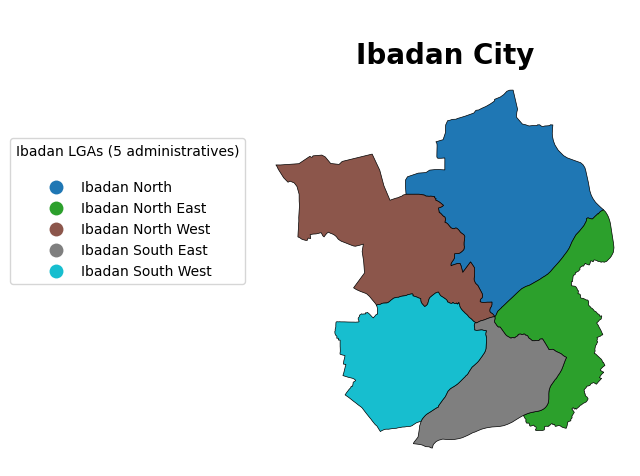

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
ib_lga_shape1.plot(ax=ax, column="LGAName", legend=True,
                   legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                                "ncol": 1,
                                "title": f"Ibadan LGAs ({ib_lga_shape1.LGAName.unique().size} administratives)\n",},
                   cmap="tab10", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();

#### Division names at the Ward level

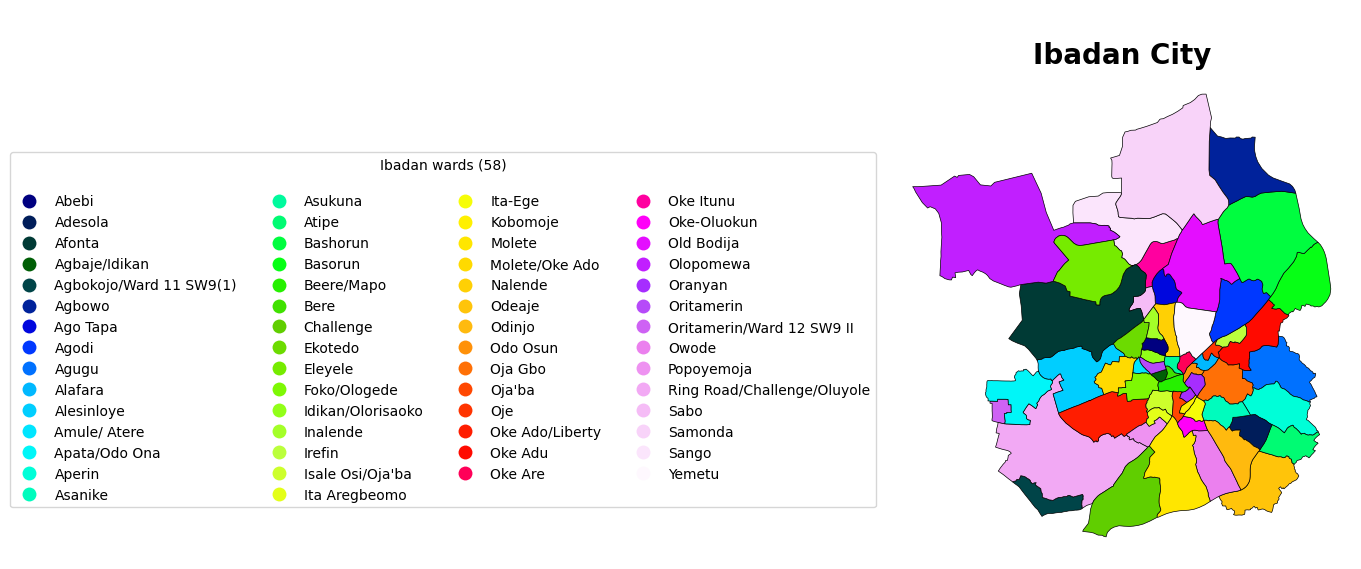

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ib_lga_shape2.plot(ax=ax, column="WardName", legend=True,
                   legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                                "ncol": 4,
                                "title": f"Ibadan wards ({ib_lga_shape2.WardName.unique().size})\n",},
                   cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();

#### LGA and Ward levels

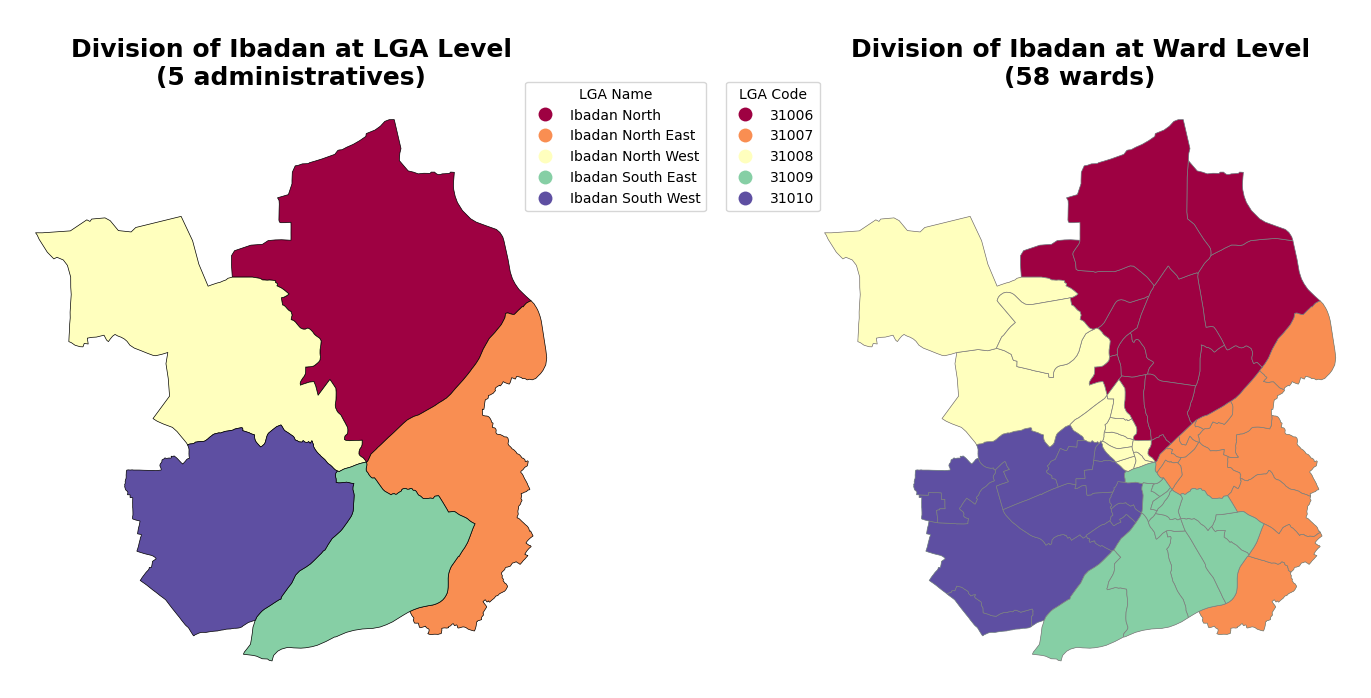

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ib_lga_shape1.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.25, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
ib_lga_shape2.plot(ax=ib_lga_shape1.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.03), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_lga_shape1.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_lga_shape2.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

### Enumeration Areas (EAs) Settlement Types

In [14]:
fname = "../data-in/NGA/EA_data/Ibadan_EAs_coord.xlsx"
ea_ib = pd.read_excel(fname)
ea_ib.head()

,city,ward,ea_code,EAS,Latitude,Longitude,Settlement
0,Ibadan,Agugu,Ag_001,Opposite Christ the king primary school I,3.919976,7.386031,Slum
1,Ibadan,Agugu,Ag_002,Beside Christ the King Primary School I,3.920514,7.386621,Slum
2,Ibadan,Agugu,Ag_003,Behind Christ the kind Primary School I,3.920634,7.385972,Slum
3,Ibadan,Agugu,Ag_004,Behind The Board of Trade,3.922894,7.386947,Slum
4,Ibadan,Agugu,Ag_005,Opposite The Board of Trade,3.922421,7.386521,Slum


In [15]:
ea_ib.ward.unique()

array(['Agugu', 'Bashorun', 'Challenge', 'Olopomewa'], dtype=object)

#### Make geometry `POINT(x, y)` to ease the visualization of campaign locations

In [16]:
geom_df = [Point(x, y) for x, y in zip(ea_ib["Longitude"], ea_ib["Latitude"])]
geo_df = gpd.GeoDataFrame(ea_ib, geometry=geom_df)

###
geo_df.head()

,city,ward,ea_code,EAS,Latitude,Longitude,Settlement,geometry
0,Ibadan,Agugu,Ag_001,Opposite Christ the king primary school I,3.919976,7.386031,Slum,POINT (7.38603 3.91998)
1,Ibadan,Agugu,Ag_002,Beside Christ the King Primary School I,3.920514,7.386621,Slum,POINT (7.38662 3.92051)
2,Ibadan,Agugu,Ag_003,Behind Christ the kind Primary School I,3.920634,7.385972,Slum,POINT (7.38597 3.92063)
3,Ibadan,Agugu,Ag_004,Behind The Board of Trade,3.922894,7.386947,Slum,POINT (7.38695 3.92289)
4,Ibadan,Agugu,Ag_005,Opposite The Board of Trade,3.922421,7.386521,Slum,POINT (7.38652 3.92242)


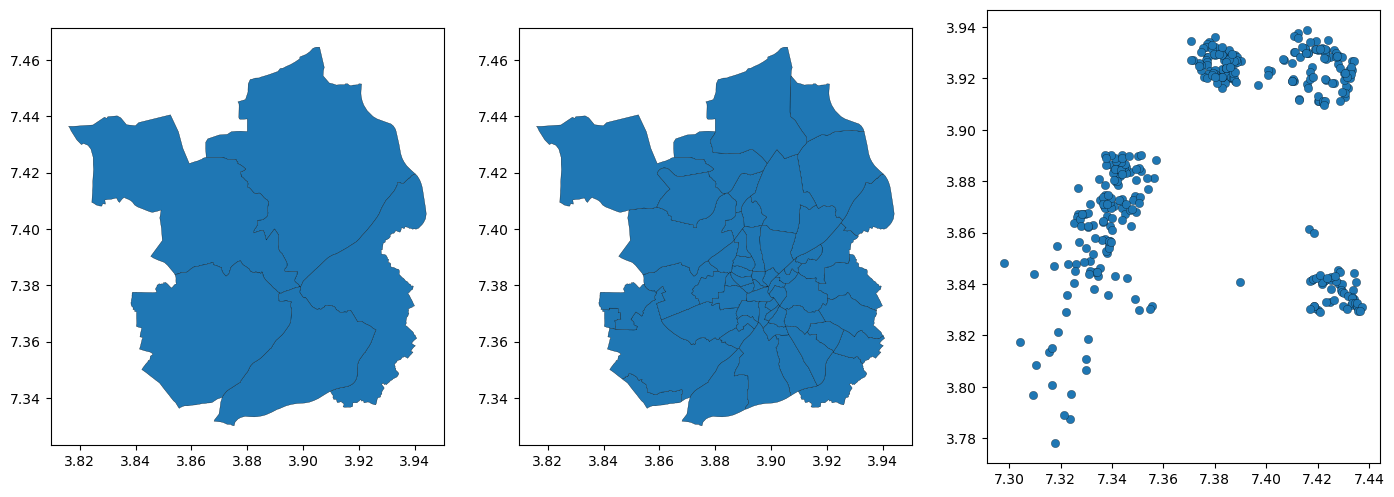

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(14, 8))

ib_lga_shape1.plot(ax=ax[0], legend=True, edgecolor="k", linewidth=0.2)
ib_lga_shape2.plot(ax=ax[1], legend=False, edgecolor="k", linewidth=0.2)
geo_df.plot(ax=ax[2], legend=False, edgecolor="k", linewidth=0.2)

fig.tight_layout();

#### Fix the issue of mis-assignment of latitudes and longitudes

As we can see on the figure above, latitudes and longitudes of the campaign locations in Idaban have been mis-assigned. To fix what I think might be the main issue here, I'm going to permutate data of Latitude ('y') column and that of Logitude ('x') column. 

In [18]:
geom_df2 = [Point(x, y) for x, y in zip(ea_ib["Latitude"], ea_ib["Longitude"])]
geo_df2 = gpd.GeoDataFrame(ea_ib, geometry=geom_df2)

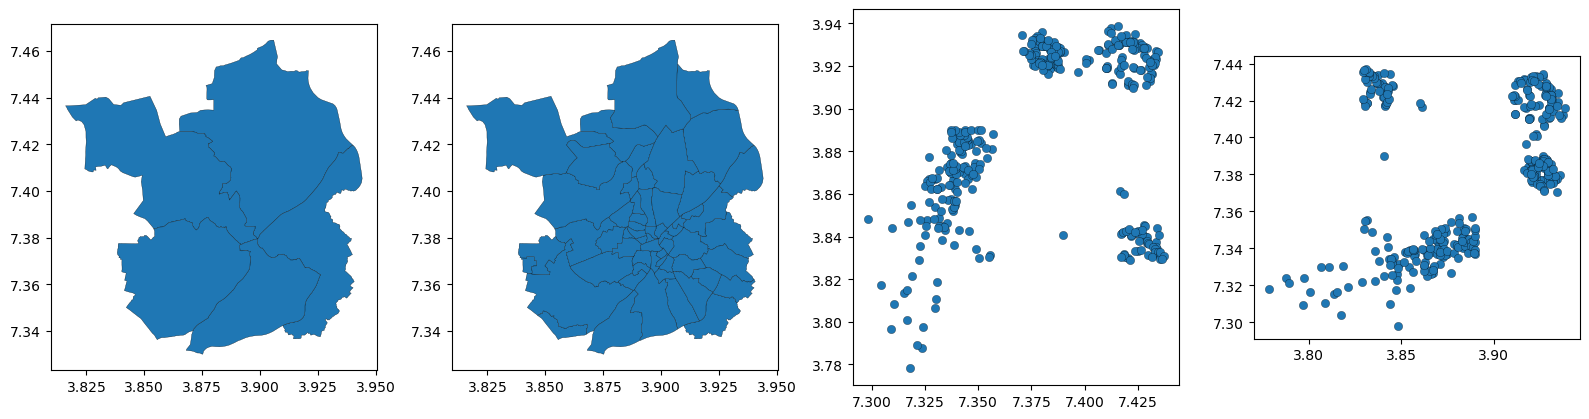

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(16, 7))

ib_lga_shape1.plot(ax=ax[0], legend=True, edgecolor="k", linewidth=0.2)
ib_lga_shape2.plot(ax=ax[1], legend=False, edgecolor="k", linewidth=0.2)
geo_df.plot(ax=ax[2], legend=False, edgecolor="k", linewidth=0.2)
geo_df2.plot(ax=ax[3], legend=False, edgecolor="k", linewidth=0.2)

fig.tight_layout();

## Select a few areas of interest (AOI)

In [20]:
ib_lga_shape2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   StateCode  59 non-null     object  
 1   WardCode   59 non-null     object  
 2   WardName   59 non-null     object  
 3   LGACode    59 non-null     object  
 4   Urban      59 non-null     object  
 5   Source     59 non-null     object  
 6   Timestamp  59 non-null     object  
 7   GlobalID   59 non-null     object  
 8   AMAPCODE   59 non-null     object  
 9   geometry   59 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 4.7+ KB


In [66]:
len(ib_lga_shape2.WardName.unique())

58

In [68]:
df = ib_lga_shape2[ib_lga_shape2.WardName == "Oranyan"]
df

,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
6,OY,OYSINE12,Oranyan,31007,Yes,INEC,2019-03-16,b711ac97-377d-451d-8e5c-8e10224de2af,NIE OYS AGG,"POLYGON ((3.90143 7.37999, 3.90159 7.37989, 3...."
50,OY,OYSISE11,Oranyan,31009,Yes,INEC,2019-09-26,18c54b41-8e50-4691-a438-6158293fd4a0,NIE OYS MAP,"POLYGON ((3.90173 7.37208, 3.90127 7.37178, 3...."


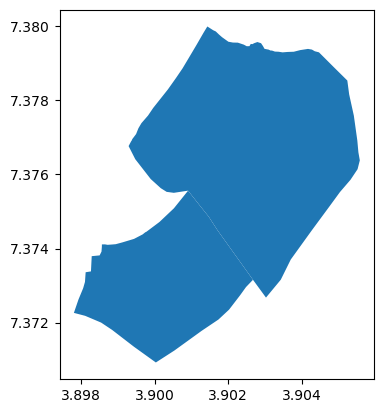

In [70]:
df.plot();

In [67]:
ib_lga_shape2.WardName

0                           Agugu
1                         Alafara
2                         Oke Adu
3                         Oja Gbo
4                         Basorun
5                        Odo Osun
6                         Oranyan
7                             Oje
8                          Irefin
9                          Odeaje
10                         Aperin
11                          Atipe
12      Oritamerin/Ward 12 SW9 II
13        Agbokojo/Ward 11 SW9(1)
14    Ring Road/Challenge/Oluyole
15                     Alesinloye
16                   Amule/ Atere
17                Oke Ado/Liberty
18                     Popoyemoja
19               Isale Osi/Oja'ba
20                 Molete/Oke Ado
21                   Foko/Ologede
22                  Ita Aregbeomo
23                  Apata/Odo Ona
24                       Ago Tapa
25                      Oke Itunu
26                          Agodi
27                       Bashorun
28                     Old Bodija
29            

In [62]:
ward = ib_lga_shape2.WardName.to_list()

In [63]:
from collections import Counter, defaultdict

def duplicates(lst):
    cnt= Counter(lst)
    return [key for key in cnt.keys() if cnt[key]> 1]

def indices(lst, items= None):
    items, ind= set(lst) if items is None else items, defaultdict(list)
    for i, v in enumerate(lst):
        if v in items: ind[v].append(i)
    return ind


In [65]:
print(indices(ward, duplicates(ward)))

defaultdict(<class 'list'>, {'Oranyan': [6, 50]})


In [21]:
ib_lga_shape2.head()

,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
3,OY,OYSINE09,Oja Gbo,31007,Yes,INEC,2019-03-16,5ebd3bb8-f111-495e-8055-2f3fd9f83906,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90998 7.38441, 3...."
4,OY,OYSINE05,Basorun,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


#### Place the EAs - `POINT(x, y)` - on Ibadan LGA/Ward map(s)   

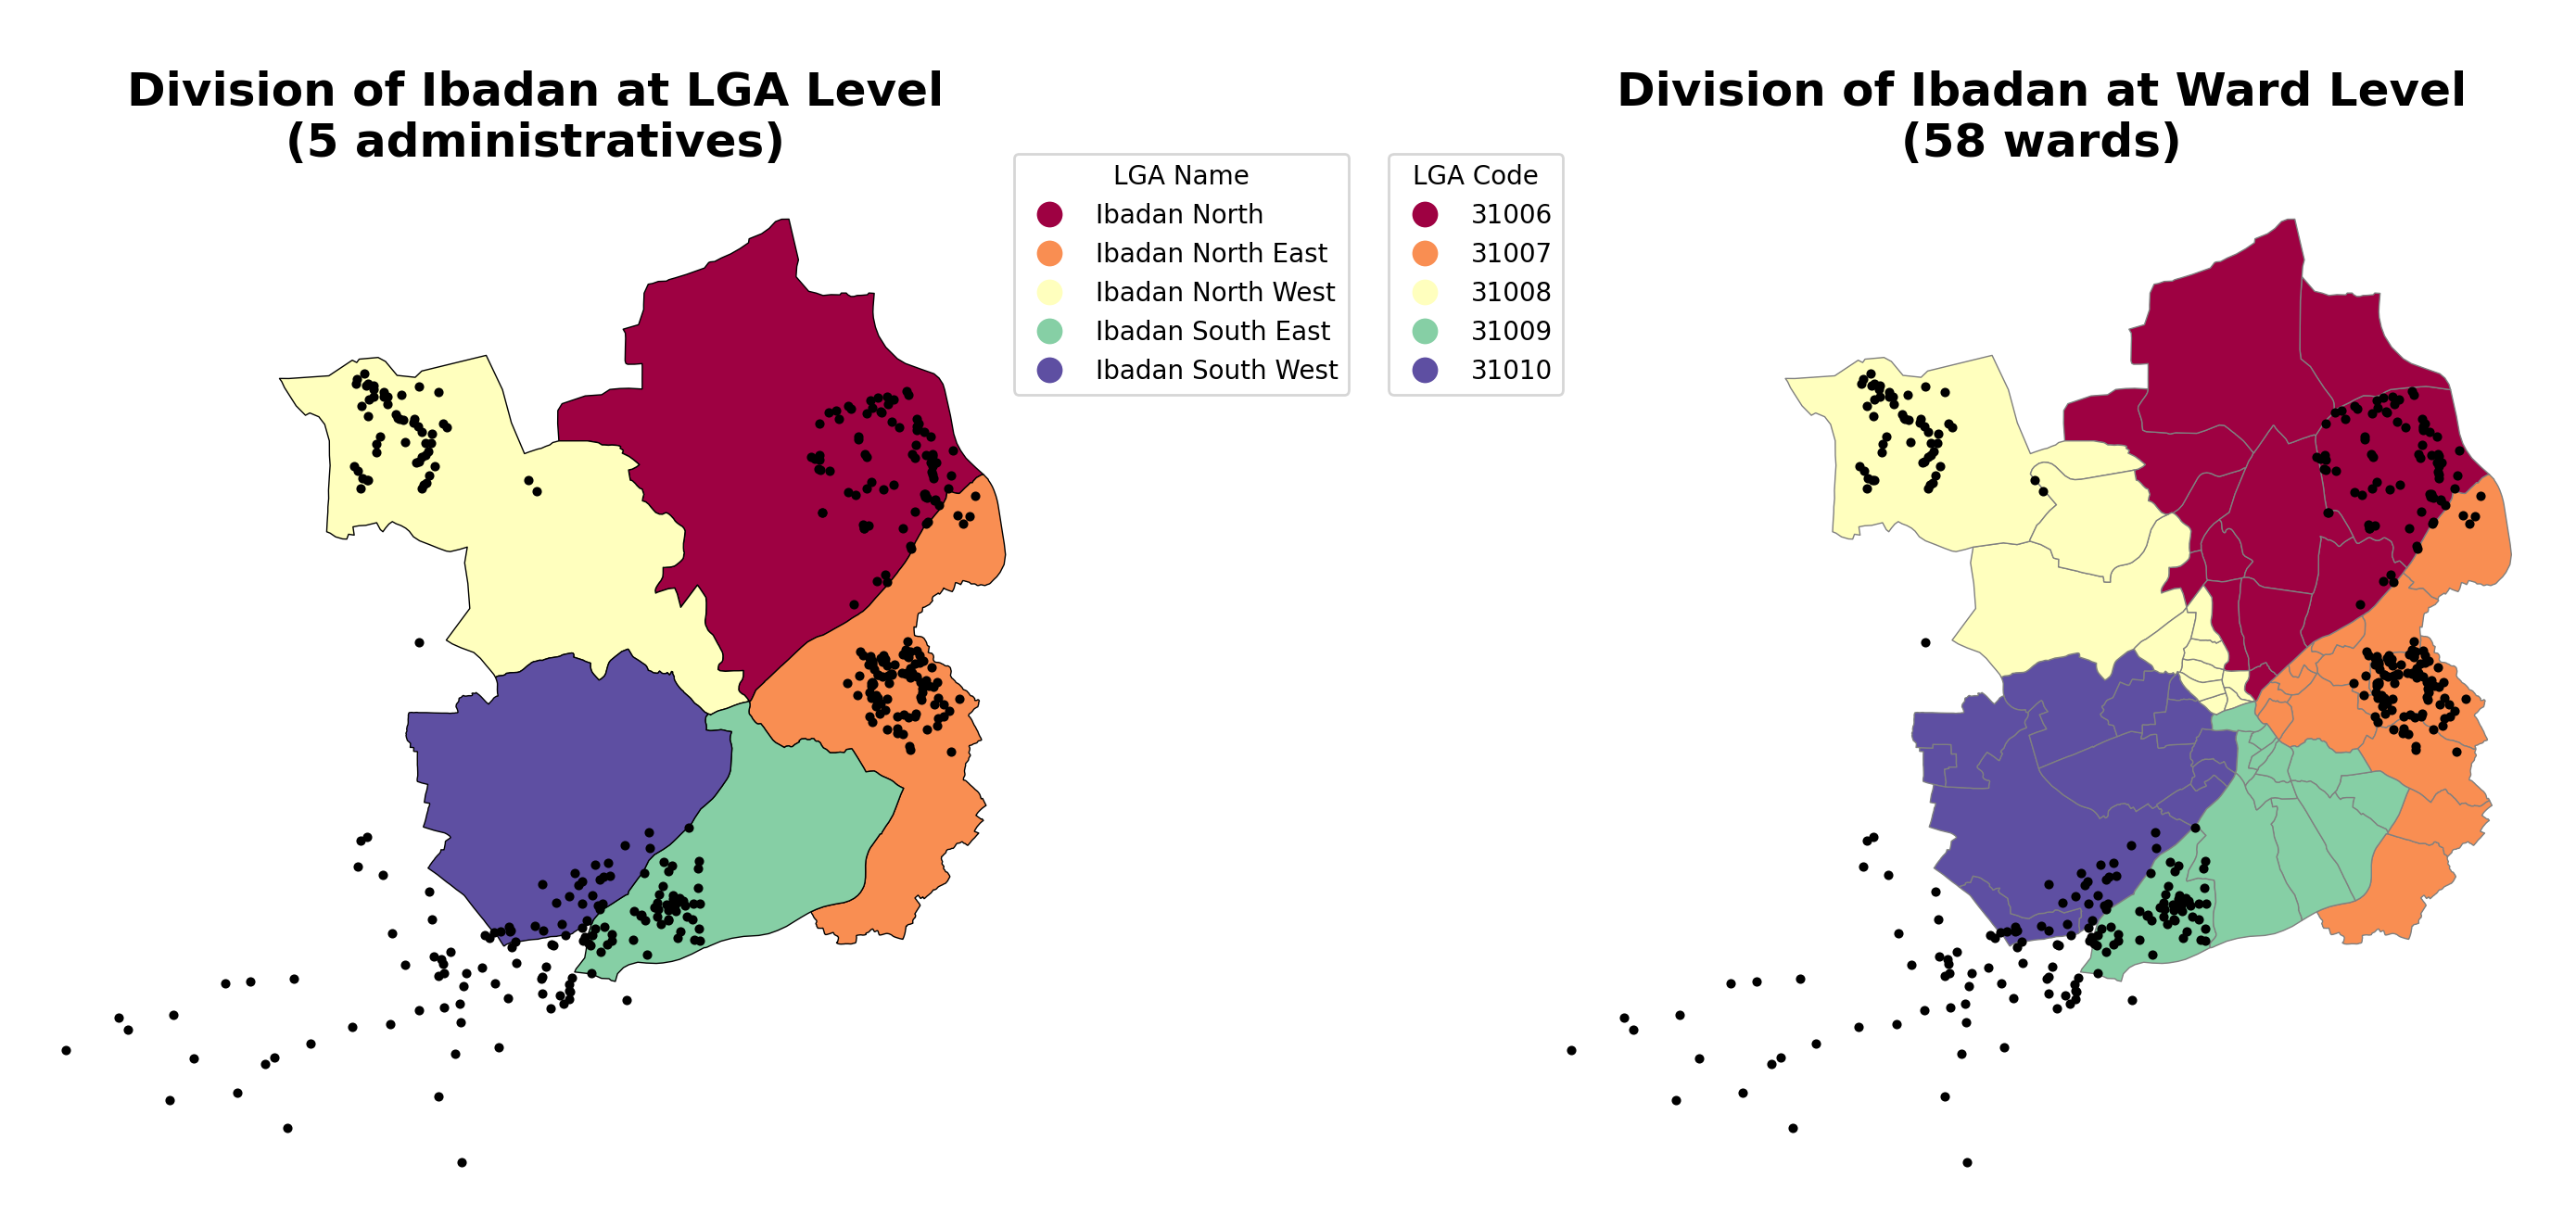

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

ib_lga_shape1.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (.95, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
ib_lga_shape2.plot(ax=ib_lga_shape1.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.03), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
geo_df2.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
geo_df2.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
# geo_df2.plot(ax=ib_lga_shape1.plot(ax=ax[0], edgecolor="k", linewidth=0.2),
#             marker="o", markersize=7, legend=True, color="k")
# geo_df2.plot(ax=ib_lga_shape2.plot(ax=ax[1], edgecolor="k", linewidth=0.2),
#             marker="o", markersize=7, legend=True, color="k")
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_lga_shape1.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_lga_shape2.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

### Selecting areas of interest (AOI)

Based on the two figures above, I'm going to narrow down the investigation on only two local government administrative (LGA) areas:

1. Abadan North
2. Ibadan North East

According to the background knowledge of the project, the campaign locations (black dots, see the two figures above) in these two LGA areas correspond to Ibadan wards:

1. Bashurun (in the LGA, Abadan North)
2. Agugu (in the LGA, Ibadan North East)



In [23]:
ib_lga_shape2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   StateCode  59 non-null     object  
 1   WardCode   59 non-null     object  
 2   WardName   59 non-null     object  
 3   LGACode    59 non-null     object  
 4   Urban      59 non-null     object  
 5   Source     59 non-null     object  
 6   Timestamp  59 non-null     object  
 7   GlobalID   59 non-null     object  
 8   AMAPCODE   59 non-null     object  
 9   geometry   59 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 4.7+ KB


In [24]:
ea_ib.ward.unique()

array(['Agugu', 'Bashorun', 'Challenge', 'Olopomewa'], dtype=object)

#### Extraction of LGA of interest: Ibadan North & Ibadan North East

In [25]:
### Extract Ibadan North & Ibadan North East LGAs
ibadan_north = ib_lga_shape2[ib_lga_shape2.LGACode=="31006"]
ibadan_north_east = ib_lga_shape2[ib_lga_shape2.LGACode=="31007"]

### Extract Aguru and Bashorun EAs 
Agugu = geo_df2[geo_df2.ward=="Agugu"].copy()
Bashorun = geo_df2[geo_df2.ward=="Bashorun"].copy()

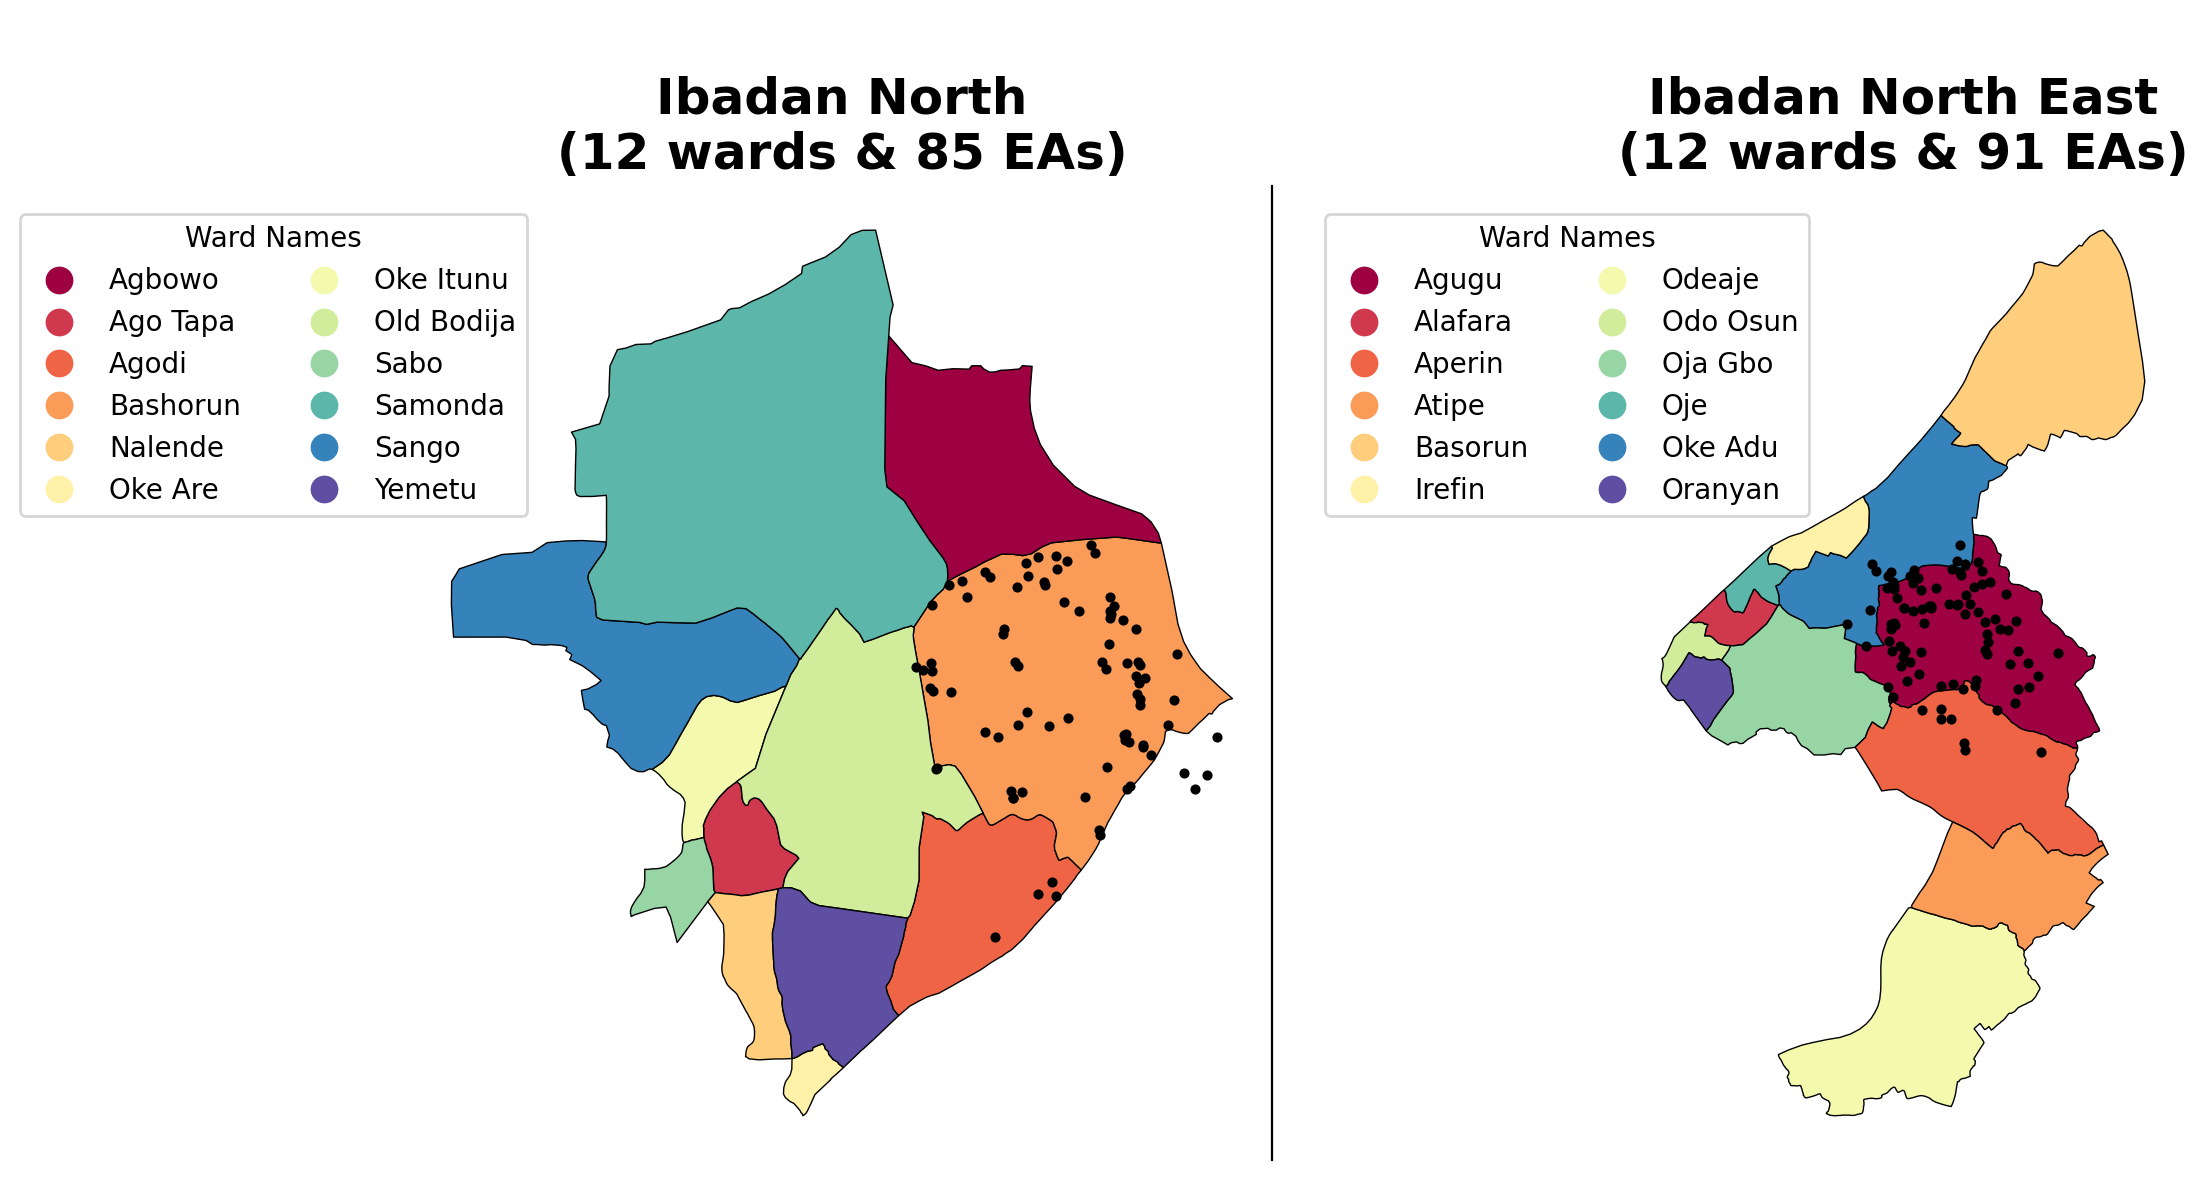

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

ibadan_north.plot(ax=ax[0], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.15, .985), "ncol": 2, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
ibadan_north_east.plot(ax=ax[1], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.35, .985), "ncol": 2, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nIbadan North\n({ibadan_north.WardName.unique().size} wards & {Bashorun.ea_code.unique().size} EAs)",
                fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nIbadan North East\n({ibadan_north_east.WardName.unique().size} wards & {Agugu.ea_code.unique().size} EAs)",
                fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

#### Extraction of Wards of interest

Based of the two figures above, the main Wards of interest within the two LGAs of interest are the following:
1. LGA 1 - Ibadan North:
   * Bashorun
   * Agodi
2. LGA 2 – Ibadan North East:
   * Agugu
   * Aperin
   * Oke Adu
   * Basorun (due to the overlap with 3 EAs from LGA 1 figure)

In [27]:
### Ibadan North
Bashorun_LGA = ibadan_north[ibadan_north.WardName=="Bashorun"].copy()
Agodi_LGA = ibadan_north[ibadan_north.WardName=="Agodi"].copy()

### Ibadan North East
Agugu_LGA = ibadan_north_east[ibadan_north_east.WardName=="Agugu"].copy()
Aperin_LGA = ibadan_north_east[ibadan_north_east.WardName=="Aperin"].copy()
Oke_Adu_LGA = ibadan_north_east[ibadan_north_east.WardName=="Oke Adu"].copy()
Basorun_LGA = ibadan_north_east[ibadan_north_east.WardName=="Basorun"].copy()

### Combine into one data
Ward_ib_north_AOI = pd.concat([Bashorun_LGA, Agodi_LGA])
Ward_ib_north_east_AOI = pd.concat([Agugu_LGA, Aperin_LGA, Oke_Adu_LGA, Basorun_LGA])
Ward_ib_AOI = pd.concat([Bashorun_LGA, Agodi_LGA, Agugu_LGA, Aperin_LGA, Oke_Adu_LGA, Basorun_LGA])

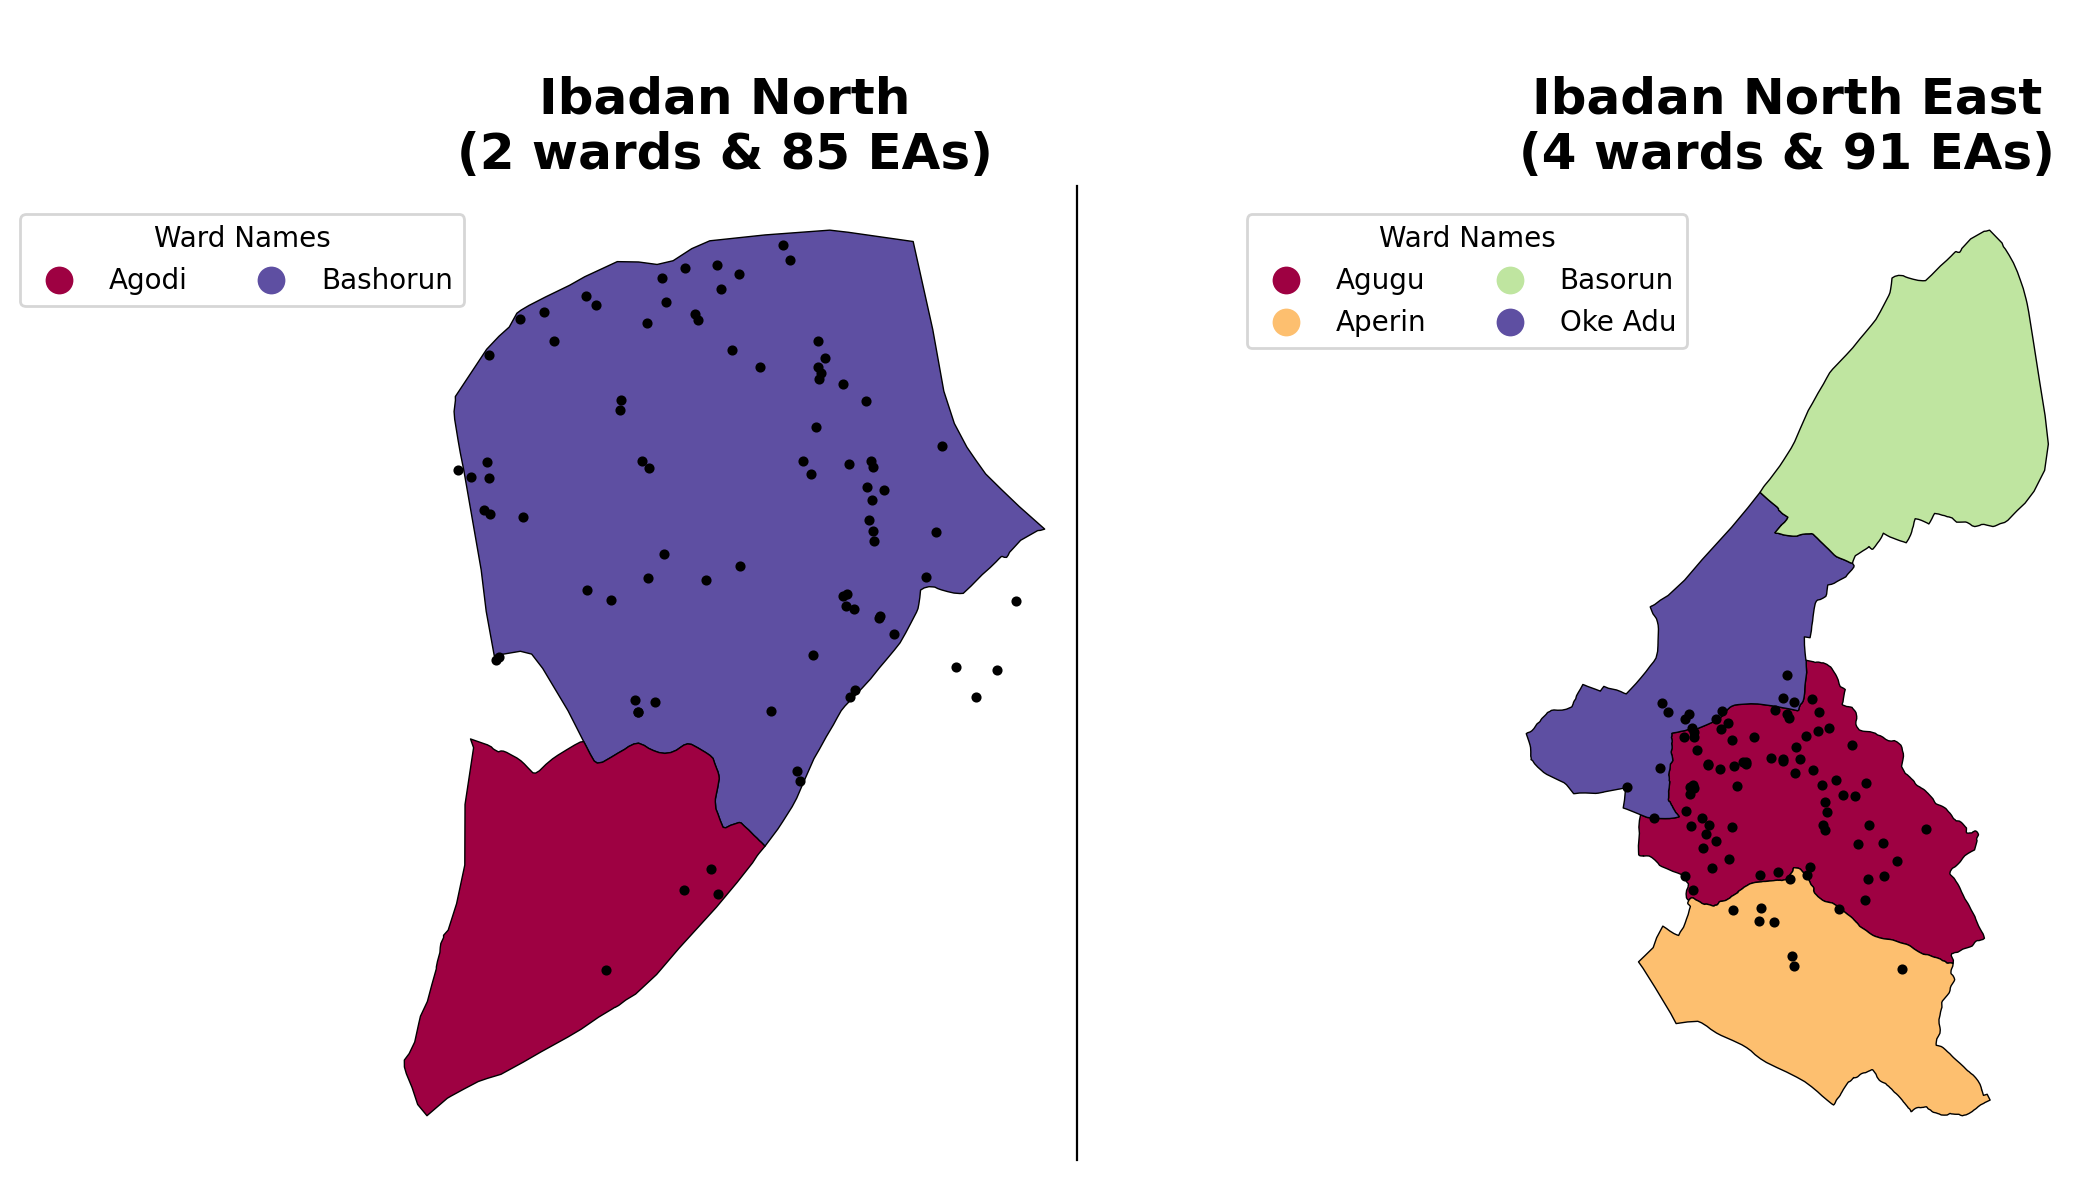

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

Ward_ib_north_AOI.plot(ax=ax[0], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.15, .985), "ncol": 2, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
Ward_ib_north_east_AOI.plot(ax=ax[1], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.35, .985), "ncol": 2, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nIbadan North\n({Ward_ib_north_AOI.WardName.unique().size} wards & {Bashorun.ea_code.unique().size} EAs)",
                fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nIbadan North East\n({Ward_ib_north_east_AOI.WardName.unique().size} wards & {Agugu.ea_code.unique().size} EAs)",
                fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

#### Visualize combined Wards and EAs of interest

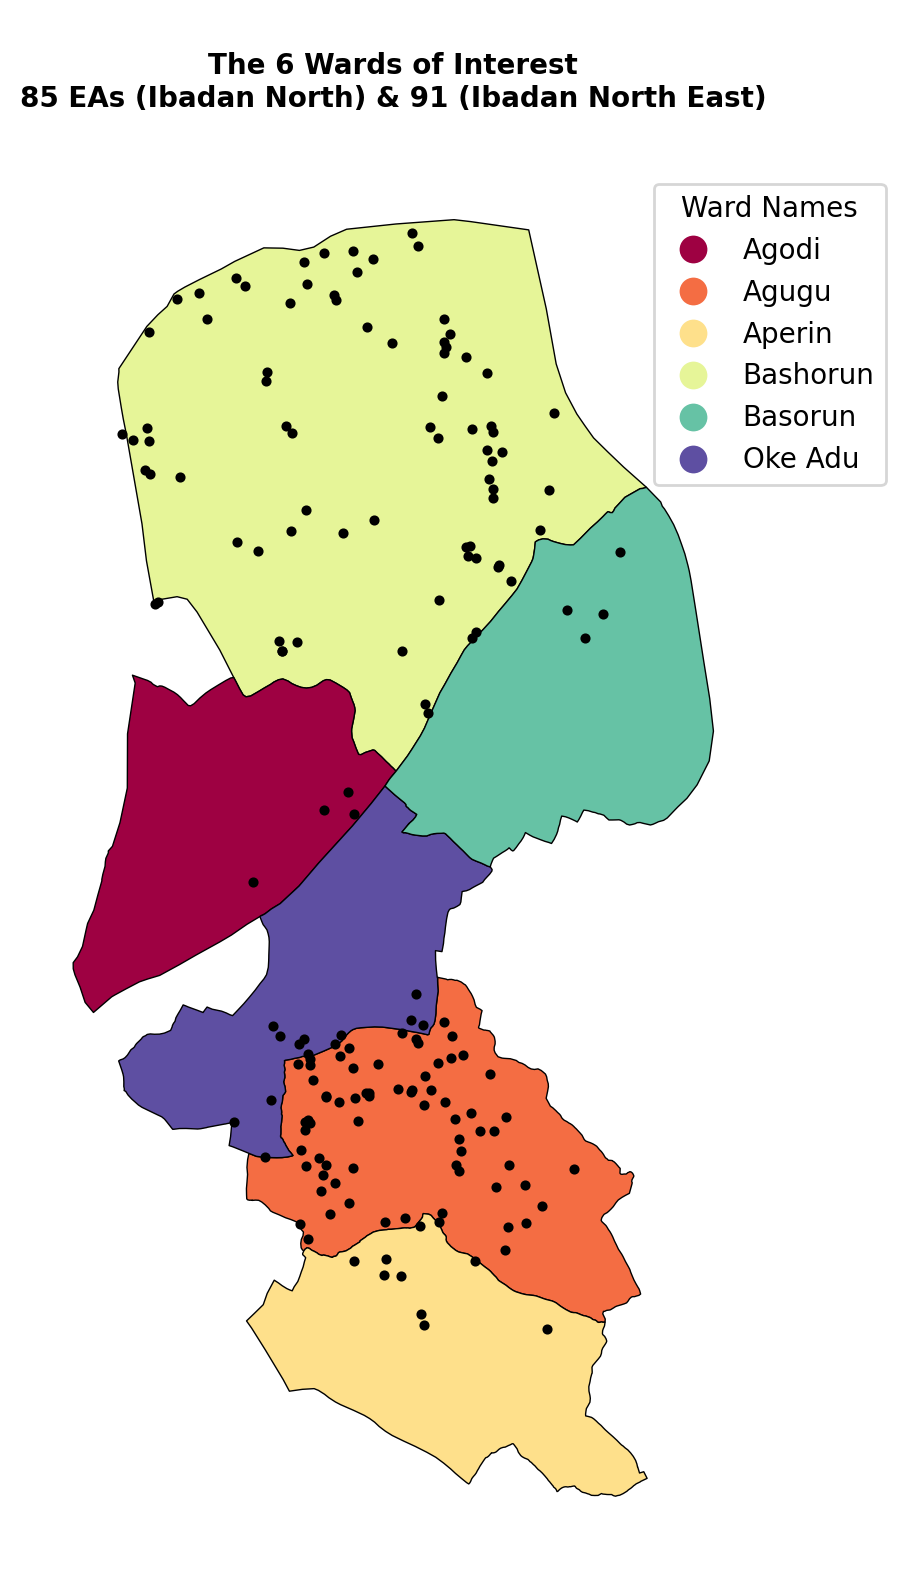

In [29]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

Ward_ib_AOI.plot(ax=ax, column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.85, .99), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
###
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)


ax.set_title(f"\nThe {Ward_ib_AOI.WardName.unique().size} Wards of Interest\n{Bashorun.ea_code.unique().size} EAs (Ibadan North) & {Agugu.ea_code.unique().size} (Ibadan North East)\n",
                fontdict={"size": 10, "weight": "bold"})
# ax.set_title(f"\nIbadan North East\n({Ward_ib_AOI.WardName.unique().size} wards & {Agugu.ea_code.unique().size} EAs)",
#                 fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();

### Save the shapefiles of AOI for Satellite image extractions

In [42]:
### Base directory
shape_outdir = "../data-out/aoi-shapefiles"

In [43]:
Ward_ib_AOI.set_index("WardName")

,StateCode,WardCode,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
WardName,,,,,,,,,
Bashorun,OY,OYSIBN04,31006,Yes,INEC,2019-09-26,68e63cf2-7b09-4c12-931d-070738f24664,NIE OYS BDJ,"POLYGON ((3.92314 7.40708, 3.92313 7.40710, 3...."
Agodi,OY,OYSIBN03,31006,Yes,INEC,2019-09-26,a1671e98-6bd5-43d4-84ef-2eea33c24af1,NIE OYS BDJ,"POLYGON ((3.91117 7.40833, 3.91121 7.40832, 3...."
Agugu,OY,OYSINE01,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
Aperin,OY,OYSINE03,31007,Yes,INEC,2019-03-16,45568317-7f8f-4031-9e56-b283190433de,NIE OYS AGG,"POLYGON ((3.93704 7.37123, 3.93713 7.37119, 3...."
Oke Adu,OY,OYSINE11,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
Basorun,OY,OYSINE05,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


#### Make the shapefile data of AOI and check CRS

In [44]:
### Make the shapefiles of AOI for Satellite image extractions
shapefile_aoi = Ward_ib_AOI.set_index("WardName")[["geometry"]]
shapefile_aoi

,geometry
WardName,
Bashorun,"POLYGON ((3.92314 7.40708, 3.92313 7.40710, 3...."
Agodi,"POLYGON ((3.91117 7.40833, 3.91121 7.40832, 3...."
Agugu,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
Aperin,"POLYGON ((3.93704 7.37123, 3.93713 7.37119, 3...."
Oke Adu,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
Basorun,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


In [45]:
shapefile_aoi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

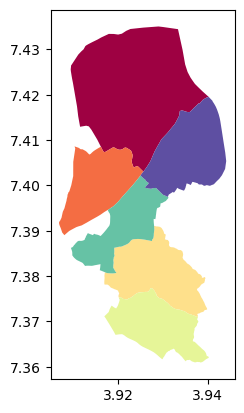

In [46]:
shapefile_aoi.plot(cmap="Spectral");

#### Save the extracted shapefile

In [27]:
# ### Output file path
# outfilepath = os.path.join(shape_outdir, "shapefile_of_Ibadan_LGA_wards_of_interest.shp")

# ### Save to the disk
# shapefile_aoi.to_file(outfilepath)

(378, 8)

In [33]:
geo_df2.head()

,city,ward,ea_code,EAS,Latitude,Longitude,Settlement,geometry
0,Ibadan,Agugu,Ag_001,Opposite Christ the king primary school I,3.919976,7.386031,Slum,POINT (3.91998 7.38603)
1,Ibadan,Agugu,Ag_002,Beside Christ the King Primary School I,3.920514,7.386621,Slum,POINT (3.92051 7.38662)
2,Ibadan,Agugu,Ag_003,Behind Christ the kind Primary School I,3.920634,7.385972,Slum,POINT (3.92063 7.38597)
3,Ibadan,Agugu,Ag_004,Behind The Board of Trade,3.922894,7.386947,Slum,POINT (3.92289 7.38695)
4,Ibadan,Agugu,Ag_005,Opposite The Board of Trade,3.922421,7.386521,Slum,POINT (3.92242 7.38652)


In [49]:
geo_df3 = geo_df2.rename(columns={"Latitude": "Longitude", "Longitude": "Latitude"})
EAs = {EA.replace("-", "").replace(" ", "_"): EA for EA in geo_df3["EAS"].to_list()}
geo_df3.head()

,city,ward,ea_code,EAS,Longitude,Latitude,Settlement,geometry
0,Ibadan,Agugu,Ag_001,Opposite Christ the king primary school I,3.919976,7.386031,Slum,POINT (3.91998 7.38603)
1,Ibadan,Agugu,Ag_002,Beside Christ the King Primary School I,3.920514,7.386621,Slum,POINT (3.92051 7.38662)
2,Ibadan,Agugu,Ag_003,Behind Christ the kind Primary School I,3.920634,7.385972,Slum,POINT (3.92063 7.38597)
3,Ibadan,Agugu,Ag_004,Behind The Board of Trade,3.922894,7.386947,Slum,POINT (3.92289 7.38695)
4,Ibadan,Agugu,Ag_005,Opposite The Board of Trade,3.922421,7.386521,Slum,POINT (3.92242 7.38652)


In [54]:
# EAs

In [55]:
geo_df3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   city        378 non-null    object  
 1   ward        378 non-null    object  
 2   ea_code     378 non-null    object  
 3   EAS         378 non-null    object  
 4   Longitude   378 non-null    float64 
 5   Latitude    378 non-null    float64 
 6   Settlement  378 non-null    object  
 7   geometry    378 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 23.8+ KB


In [35]:
### Output file path
sname1 = "../data-in/ibadan_EAs_of_interest/shapefile_of_Ibadan_EAs_of_interest.shp"
sname2 = "../data-in/ibadan_EAs_of_interest_v2//shapefile_of_Ibadan_EAs_of_interest_v2.shp"

### Save to the disk
geo_df3.to_file(sname2)

In [ ]:
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {"EA": "Opposite Christ the king primary school I", "SettlementType": "Slum"},
      "geometry": {
        "coordinates": [
          3.91998,
          7.38603
        ],
        "type": "Point"
      }
    }
  ]
}

In [32]:
geo_df2.columns

Index(['city', 'ward', 'ea_code', 'EAS', 'Latitude', 'Longitude', 'Settlement',
       'geometry'],
      dtype='object')

In [ ]:
geo_df2[[]]

In [22]:
from shapely.geometry import Polygon

In [28]:
# geom_df3 = [Polygon(x, y) for x, y in zip(ea_ib["Latitude"], ea_ib["Longitude"])]
# geo_df3 = gpd.GeoDataFrame(ea_ib, geometry=geom_dfs)
# geo_df3

In [52]:
### Test
gdf = gpd.read_file(outfilepath)
gdf

,WardName,geometry
0,Bashorun,"POLYGON ((3.92314 7.40708, 3.92313 7.40710, 3...."
1,Agodi,"POLYGON ((3.91117 7.40833, 3.91121 7.40832, 3...."
2,Agugu,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
3,Aperin,"POLYGON ((3.93704 7.37123, 3.93713 7.37119, 3...."
4,Oke Adu,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
5,Basorun,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


In [53]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

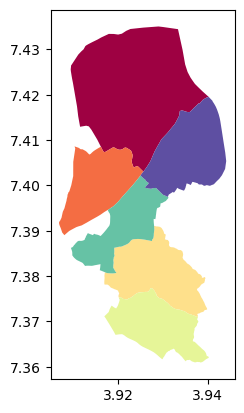

In [54]:
gdf.plot(cmap="Spectral");

### What about LGA level only?

Still exploring!